# Calculating diversity and mutation

## Calculating mutational load
To calculate mutational load, the functions from `immcantation` suite's `shazam` [[Gupta2015]](https://academic.oup.com/bioinformatics/article/31/20/3356/195677) can be accessed via `rpy2` to work with the `dandelion` class object.

This can be run immediately after `pp.reassign_alleles` during the reannotation pre-processing stage because the required germline columns should be present in the genotyped `.tsv` file. I would recommend to run this after TIgGER [[Gadala-Maria2015]](https://www.pnas.org/content/112/8/E862), after the v_calls were corrected. Otherwise, if the reannotation was skipped, you can run it now as follows:

<b>Import modules</b>

In [1]:
import os
import pandas as pd
import dandelion as ddl

ddl.logging.print_header()

dandelion==0.3.4.dev29 pandas==2.0.1 numpy==1.24.3 matplotlib==3.7.1 networkx==3.1 scipy==1.11.2


In [2]:
# change directory to somewhere more workable
os.chdir(os.path.expanduser("~/Downloads/dandelion_tutorial/"))
# I'm importing scanpy here to make use of its logging module.
import scanpy as sc

sc.settings.verbosity = 3
import warnings

warnings.filterwarnings("ignore")
sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.11.2 pandas==2.0.1 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


<b>Read in the previously saved files</b>

In [3]:
adata = sc.read_h5ad("adata.h5ad")
adata

AnnData object with n_obs × n_vars = 22985 × 1464
    obs: 'sampleid', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'has_contig', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_genotyped_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_genotyped_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_genotyped_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_B_VDJ_main', 'd_call_B_VDJ_main', 'j_call_B_VDJ_main', 'v_call_B_VJ_main', 'j_call_B_VJ_main', 'isotype', 'isotype_status', 'locus_sta

In [4]:
vdj = ddl.read_h5ddl("dandelion_results.h5ddl")
vdj

Dandelion class object with n_obs = 2071 and n_contigs = 4882
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_bla

In [5]:
# let's recreate the vdj object with only the first two samples
subset_data = vdj.data[
    vdj.data["sample_id"].isin(["sc5p_v2_hs_PBMC_1k", "sc5p_v2_hs_PBMC_10k"])
]
subset_data

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,...,j_call_multimappers,j_call_multiplicity,j_call_sequence_start_multimappers,j_call_sequence_end_multimappers,j_call_support_multimappers,mu_count,ambiguous,rearrangement_status,clone_id,changeo_clone_id
sequence_id,,,,,,,,,,,,,,,,,,,,,
sc5p_v2_hs_PBMC_10k_AAACCTGTCCGTTGTC_contig_2,sc5p_v2_hs_PBMC_10k_AAACCTGTCCGTTGTC_contig_2,ATCACATAACAACCACATTCCTCCTCTAAAGAAGCCCCTGGGAGCA...,F,T,"IGHV1-69*01,IGHV1-69D*01",IGHD3-22*01,IGHJ3*02,CAGGTGCAGCTGGTGCAGTCTGGGGCT...GAGGTGAAGAAGCCTG...,CAGGTGCAGCTGGTGCAGTCTGGGGCT...GAGGTGAAGAAGCCTG...,TGTGCGACTACGTATTACTATGATAGTAGTGGTTATTACCAGAATG...,...,IGHJ3*02,1.0,445.0,494.0,0.0,0,F,standard,B_VDJ_119_3_2_VJ_80_2_3,11_0
sc5p_v2_hs_PBMC_10k_AAACCTGTCCGTTGTC_contig_1,sc5p_v2_hs_PBMC_10k_AAACCTGTCCGTTGTC_contig_1,AGGAGTCAGACCCTGTCAGGACACAGCATAGACATGAGGGTCCCCG...,F,T,IGKV1-8*01,,IGKJ1*01,GCCATCCGGATGACCCAGTCTCCATCCTCATTCTCTGCATCTACAG...,GCCATCCGGATGACCCAGTCTCCATCCTCATTCTCTGCATCTACAG...,TGTCAACAGTATTATAGTTACCCTCGGACGTTC,...,IGKJ1*01,1.0,380.0,415.0,0.0,0,F,standard,B_VDJ_119_3_2_VJ_80_2_3,11_0
sc5p_v2_hs_PBMC_10k_AAACCTGTCGAGAACG_contig_1,sc5p_v2_hs_PBMC_10k_AAACCTGTCGAGAACG_contig_1,ACTGTGGGGGTAAGAGGTTGTGTCCACCATGGCCTGGACTCCTCTC...,F,T,IGLV5-45*02,,IGLJ3*02,CAGGCTGTGCTGACTCAGCCGTCTTCC...CTCTCTGCATCTCCTG...,CAGGCTGTGCTGACTCAGCCGTCTTCC...CTCTCTGCATCTCCTG...,TGTATGATTTGGCACAGCAGCGCTTGGGTGGTC,...,IGLJ3*01,1.0,402.0,431.0,0.0,8,F,standard,B_VDJ_42_1_2_VJ_54_1_1,150_1
sc5p_v2_hs_PBMC_10k_AAACCTGTCGAGAACG_contig_2,sc5p_v2_hs_PBMC_10k_AAACCTGTCGAGAACG_contig_2,GGGAGCATCACCCAGCAACCACATCTGTCCTCTAGAGAATCCCCTG...,F,T,IGHV1-2*02,,IGHJ3*02,CAGGTGCAACTGGTGCAGTCTGGGGGT...GAGGTAAAGAAGCCTG...,CAGGTGCAGCTGGTGCAGTCTGGGGCT...GAGGTGAAGAAGCCTG...,TGTGCGAGAGAGATAGAGGGGGACGGTGTTTTTGAAATCTGG,...,IGHJ3*02,1.0,433.0,479.0,0.0,22,F,standard,B_VDJ_42_1_2_VJ_54_1_1,150_1
sc5p_v2_hs_PBMC_10k_AAACCTGTCTTGAGAC_contig_2,sc5p_v2_hs_PBMC_10k_AAACCTGTCTTGAGAC_contig_2,GGAGTCTCCCTCACCGCCCAGCTGGGATCTCAGGGCTTCATTTTCT...,F,T,IGHV5-51*01,,IGHJ3*02,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCGG...,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCCG...,TGTGCGAGACATATCCGTGGGAACAGATTTGGCAATGATGCTTTTG...,...,IGHJ3*02,1.0,437.0,486.0,0.0,0,F,standard,B_VDJ_38_4_4_VJ_191_1_1,322_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sc5p_v2_hs_PBMC_1k_TTCCCAGAGTACATGA_contig_2,sc5p_v2_hs_PBMC_1k_TTCCCAGAGTACATGA_contig_2,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCAT...,F,T,"IGHV3-23*01,IGHV3-23D*01",IGHD1-26*01,IGHJ4*02,GAGGTCCAACTGTTGGAATCTGGGGGA...GGGTTGATACAGCCGG...,GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTG...,TGTGCGAGAGTTTTTGGGTCGGTGGGAGCTACTCGTTCTACGGACT...,...,IGHJ4*02,1.0,464,503,0.0,33,F,standard,B_VDJ_184_9_12_VJ_27_1_2,656_755
sc5p_v2_hs_PBMC_1k_TTGAACGCAGGCTGAA_contig_1,sc5p_v2_hs_PBMC_1k_TTGAACGCAGGCTGAA_contig_1,AGGAGTCAGACCCTGTCAGGACACAGCATAGACATGAGGGTCCCCG...,F,T,IGKV1-8*01,,IGKJ1*01,GCCATCCGGATGACCCAGTCTCCATCCTCATTCTCTGCATCTACAG...,GCCATCCGGATGACCCAGTCTCCATCCTCATTCTCTGCATCTACAG...,TGTCAACAGTATTATAGTTACCCGTGGACGTTC,...,IGKJ1*01,1.0,378,415,0.0,0,F,standard,B_VDJ_12_11_2_VJ_80_2_4,920_706
sc5p_v2_hs_PBMC_1k_TTGAACGCAGGCTGAA_contig_2,sc5p_v2_hs_PBMC_1k_TTGAACGCAGGCTGAA_contig_2,CGAGCCCAGCACTGGAAGTCGCCGGTGTTTCCATTCGGTGATCATC...,F,T,IGHV3-30-3*01,IGHD3-9*01,IGHJ4*02,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCGTGGTCCAGCCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCGTGGTCCAGCCTG...,TGTGCGAGAGATGAGTTAGATATTTTGACTGGTTACAATATCCCAA...,...,IGHJ4*02,1.0,469,509,0.0,0,F,standard,B_VDJ_12_11_2_VJ_80_2_4,920_706


In [6]:
# create a new Dandelion class with this subset
vdj2 = ddl.Dandelion(subset_data)
vdj2

Dandelion class object with n_obs = 771 and n_contigs = 1808
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_blas

### `store_germline_reference`

<div class="alert alert-warning">
    
Note

From 0.2.4 onward, this is will replace update_germline as the name was misleading.

</div>

We can store the corrected germline fasta files (after running TIgGER) in the `Dandelion` class as a dictionary.

In [7]:
# update the germline using the corrected files after tigger
vdj2.store_germline_reference(
    corrected="tutorial_scgp1/tutorial_scgp1_heavy_igblast_db-pass_genotype.fasta",
    germline=None,
    org="human",
)

Updating germline reference
 finished: Updated Dandelion object: 
   'germline', updated germline reference
 (0:00:00)


### `pp.create_germlines`

Then we run `pp.create_germline` to (re)create the `germline_alignment_d_mask` column in the data. This works by calling `CreateGermlines.py` with only `-d` and `-r` options. Add further arguments with `additional_args` like below for your needs. See https://changeo.readthedocs.io/en/stable/examples/germlines.html for more info.

In [8]:
ddl.pp.create_germlines(vdj2, additional_args=["--vf", "v_call_genotyped"])

Reconstructing germline sequences
Running command: CreateGermlines.py -d /var/folders/_r/j_8_fj3x28n2th3ch0ckn9c40000gt/T/tmph34fx0x4/tmp.tsv -r /var/folders/_r/j_8_fj3x28n2th3ch0ckn9c40000gt/T/tmph34fx0x4/germ.fasta --vf v_call_genotyped

     START> CreateGermlines
      FILE> tmp.tsv
GERM_TYPES> dmask
 SEQ_FIELD> sequence_alignment
   V_FIELD> v_call_genotyped
   D_FIELD> d_call
   J_FIELD> j_call
    CLONED> False

PROGRESS> 00:05:31 |####################| 100% (1,808) 0.0 min

 OUTPUT> tmp_germ-pass.tsv
RECORDS> 1808
   PASS> 1808
   FAIL> 0
    END> CreateGermlines

 finished: Returning Dandelion object: 
 (0:00:02)


Dandelion class object with n_obs = 771 and n_contigs = 1808
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_start', 'c_sequence_end', 'c_score', 'c_identity', 'junction_aa_length', 'fwr1_aa', 'fwr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr1_aa', 'cdr2_aa', '

Ensure that the `germline_alignment_d_mask` column is populated or subsequent steps will fail.

In [9]:
vdj2.data[["v_call_genotyped", "germline_alignment_d_mask"]]

,v_call_genotyped,germline_alignment_d_mask
sequence_id,,
sc5p_v2_hs_PBMC_10k_AAACCTGTCCGTTGTC_contig_2,"IGHV1-69*01,IGHV1-69D*01",CAGGTGCAGCTGGTGCAGTCTGGGGCT...GAGGTGAAGAAGCCTG...
sc5p_v2_hs_PBMC_10k_AAACCTGTCCGTTGTC_contig_1,IGKV1-8*01,GCCATCCGGATGACCCAGTCTCCATCCTCATTCTCTGCATCTACAG...
sc5p_v2_hs_PBMC_10k_AAACCTGTCGAGAACG_contig_1,IGLV5-45*02,CAGGCTGTGCTGACTCAGCCGTCTTCC...CTCTCTGCATCTCCTG...
sc5p_v2_hs_PBMC_10k_AAACCTGTCGAGAACG_contig_2,IGHV1-2*02,CAGGTGCAGCTGGTGCAGTCTGGGGCT...GAGGTGAAGAAGCCTG...
sc5p_v2_hs_PBMC_10k_AAACCTGTCTTGAGAC_contig_2,IGHV5-51*03,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCGG...
...,...,...
sc5p_v2_hs_PBMC_1k_TTCCCAGAGTACATGA_contig_2,"IGHV3-23*01,IGHV3-23D*01",GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTG...
sc5p_v2_hs_PBMC_1k_TTGAACGCAGGCTGAA_contig_1,IGKV1-8*01,GCCATCCGGATGACCCAGTCTCCATCCTCATTCTCTGCATCTACAG...
sc5p_v2_hs_PBMC_1k_TTGAACGCAGGCTGAA_contig_2,IGHV3-30-3*01,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCGTGGTCCAGCCTG...


The default behaviour is to mask the D region with Ns with option.

### `pp.quantify_mutations`

The options for `pp.quantify_mutations` are the same as the basic mutational load analysis [vignette](https://shazam.readthedocs.io/en/version-0.1.8---mutation-profiling-enhancements/vignettes/Mutation-Vignette/) [[Gupta2015]](https://academic.oup.com/bioinformatics/article/31/20/3356/195677). The default behavior is to sum all mutations scores (heavy and light chains, silent and replacement mutations) for the same cell.

Again, this function can be run immediately after `pp.reassign_alleles` on the genotyped `.tsv` files (without loading into `pandas` or `Dandelion`). Here I'm illustrating a few other options that may be useful.

In [10]:
# switching back to using the full vdj object
ddl.pp.quantify_mutations(vdj)

Quantifying mutations
 finished: Updated Dandelion object: 
   'data', contig-indexed AIRR table
   'metadata', cell-indexed observations table
 (0:00:12)


In [11]:
ddl.pp.quantify_mutations(vdj, combine=False)

Quantifying mutations
 finished: Updated Dandelion object: 
   'data', contig-indexed AIRR table
   'metadata', cell-indexed observations table
 (0:00:06)


Specifying `split_locus = True` will split up the results for the different chains.

In [12]:
ddl.pp.quantify_mutations(vdj, split_locus=True)

Quantifying mutations
 finished: Updated Dandelion object: 
   'data', contig-indexed AIRR table
   'metadata', cell-indexed observations table
 (0:00:07)


To update the `AnnData` object, simply rerun `tl.transfer`.

In [13]:
ddl.tl.transfer(adata, vdj)

Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:07)


In [14]:
adata

AnnData object with n_obs × n_vars = 22985 × 1464
    obs: 'sampleid', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'has_contig', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_genotyped_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_genotyped_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_genotyped_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_B_VDJ_main', 'd_call_B_VDJ_main', 'j_call_B_VDJ_main', 'v_call_B_VJ_main', 'j_call_B_VJ_main', 'isotype', 'isotype_status', 'locus_sta

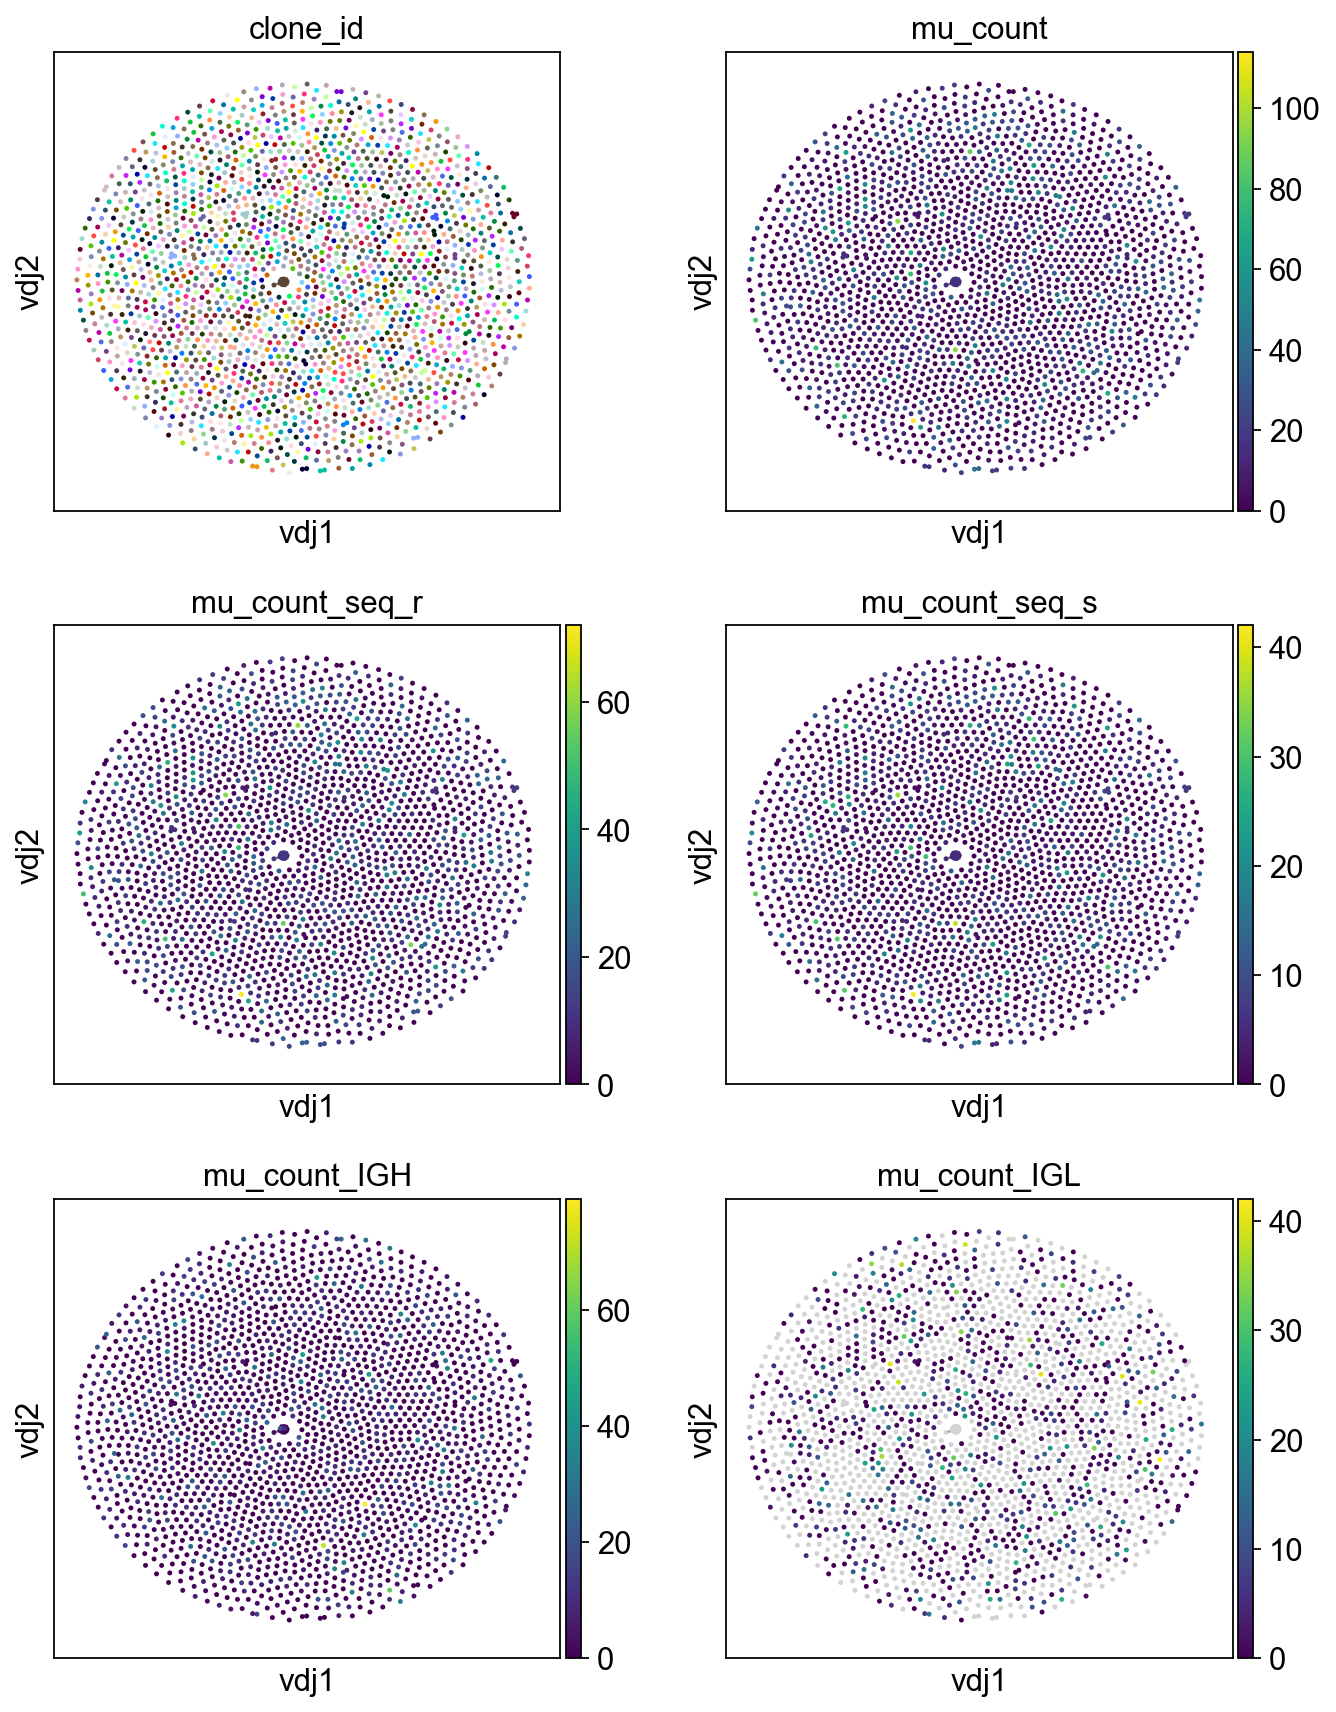

In [15]:
from scanpy.plotting.palettes import default_28, default_102

sc.set_figure_params(figsize=[4, 4])
ddl.pl.clone_network(
    adata,
    color=[
        "clone_id",
        "mu_count",
        "mu_count_seq_r",
        "mu_count_seq_s",
        "mu_count_IGH",
        "mu_count_IGL",
    ],
    ncols=2,
    legend_loc="none",
    legend_fontoutline=3,
    edges_width=1,
    palette=default_28 + default_102,
    color_map="viridis",
    size=20,
)

## Calculating diversity

*Disclaimer: the functions here are experimental. Please look to other sources/methods for doing this properly. Also, would appreciate any help to help me finalise this!* 

`tl.clone_rarefaction` and `pl.clone_rarefaction`

We can use `pl.clone_rarefaction` to generate rarefaction curves for the clones. `tl.clone_rarefaction` will populate the `.uns` slot with the results. `groupby` option must be specified. In this case, I decided to group by sample. The function will only work on an `AnnData` object and not a `Dandelion` object.

removing due to zero counts: 


Calculating rarefaction curve : 100%|██████████| 4/4 [00:00<00:00, 13.48it/s]


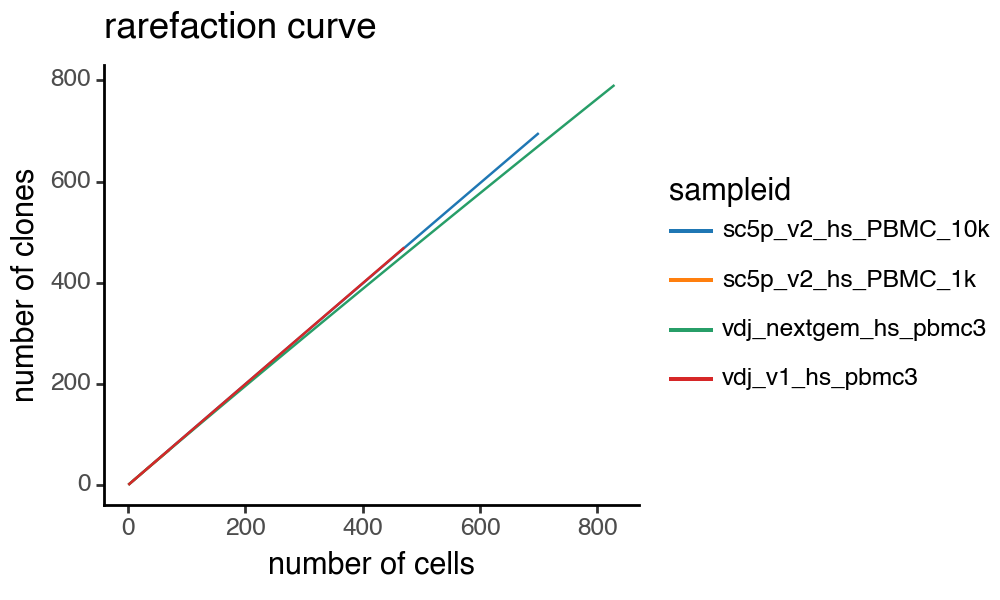

<Figure Size: (500 x 300)>

In [16]:
ddl.pl.clone_rarefaction(adata, color="sampleid")

### `ddl.tl.clone_diversity`

`tl.clone_diversity` allows for calculation of diversity measures such as <b>Chao1</b>, <b>Shannon Entropy</b> and <b>Gini indices</b>. 

While the function can work on both `AnnData` and `Dandelion` objects, the methods for gini index calculation will only work on a `Dandelion` object as it requires access to the network. 

For Gini indices, we provide several types of measures, inspired by bulk BCRseq analysis methods from [[Bashford-Rogers2013]](https://genome.cshlp.org/content/23/11/1874):

The following two indices are returned with `metric="clone_network"`.
   
   <b>I. network cluster/clone size Gini index</b> 
    
   In a contracted BCR network (where identical BCRs are collapsed into the same node/vertex), disparity in the distribution should be correlated to the amount of mutation events i.e. larger networks should indicate more mutation events and smaller networks should indicate lesser mutation events.

   <b>II. network vertex/node size Gini index</b>
    
   In the same contracted network, we can count the number of merged/contracted nodes; nodes with higher count numbers indicate more clonal expansion. Thus, disparity in the distribution of count numbers (referred to as vertex size) should be correlated to the overall clonality i.e. clones with larger vertex sizes are more monoclonal and clones with smaller vertex sizes are more polyclonal.
    
Therefore, a Gini index of 1 on either measures repesents perfect inequality (i.e. monoclonal and highly mutated) and a value of 0 represents perfect equality (i.e. polyclonal and unmutated).

<div class="alert alert-warning">

Note

However, there are a few limitations/challenges that comes with single-cell data: 

- <b>A.</b> In the process of contracting the network, we discard the single-cell level information. <br><br>

- <b>B.</b> Contraction of network is very slow, particularly when there is a lot of clonally-related cells. <br><br>

- <b>C.</b> For the full implementation and interpretation of both measures, although more evident with cluster/clone size, it requires the BCR repertoire to be reasonably/deeply sampled and we know that this is currently limited by the low recovery from single cell data with current technologies.

</div>

Therefore, we implement a few work around options, and 'experimental' options below, to try and circumvent these issues.

Firstly, as a work around for (C), the cluster size gini index can be calculated before or after network contraction. If performing before network contraction (default), it will be calculated based on the size of subgraphs of connected components in the main graph. This will retain the single-cell information and should appropriately show the distribution of the data. If performing after network contraction, the calculation is performed after network contraction, achieving the same effect as the method for bulk BCR-seq as described above. This option can be toggled by `use_contracted` and only applies to network cluster size gini index calculation.

   <b>III. clone centrality Gini index</b> - `metric="clone_centrality"`
   
   Node/vertex closeness centrality indicates how tightly packed clones are (more clonally related) and thus the distribution of the number of cells connected in each clone informs on whether clones in general are more monoclonal or polyclonal.

   <b>IV. clone degree Gini index</b> - `metric="clone_degree"`
   
   Node/vertex degree indicates how many cells are connected to an individual cell, another indication of how clonally related cells are. However, this would also highlight cells that are in the middle of large networks but are not necessarily within clonally expanded regions (e.g. intermediate connecting cells within the minimum spanning tree).
 
   <b>V. clone size Gini index</b> - `metric="clone_size"`
   
   This is not to be confused with the network cluster size gini index calculation above as this doesn't rely on the network, although the values should be similar. This is just a simple implementation based on the data frame for the relevant `clone_id` column. By default, this metric is also returned when running `metric=clone_centrality` or `metric=clone_degree`.

<div class="alert alert-warning">

Note

For (I) and (II), we can specify `expanded_only` option to compute the statistic for all clones or expanded only clones. Unlike options (I) and (II), the current calculation for (III) and (IV) is largely influenced by the amount of expanded clones i.e. clones with at least 2 cells, and not affected by the number of singleton clones because singleton clones will have a value of 0 regardless.
</div>

The diversity functions also have the option to perform downsampling to a fixed number of cells, or to the smallest sample size specified via `groupby` (default) so that sample sizes are even when comparing between groups.

if `update_obs_meta=False`, a data frame is returned; otherwise, the value gets added to the `AnnData.obs` or `Dandelion.metadata` accordingly.

In [17]:
sc.settings.verbosity = 1  # it gets very noisy
ddl.tl.clone_diversity(
    vdj, groupby="sample_id", method="gini", metric="clone_network"
)
ddl.tl.clone_diversity(
    vdj, groupby="sample_id", method="gini", metric="clone_centrality"
)
ddl.tl.transfer(adata, vdj)

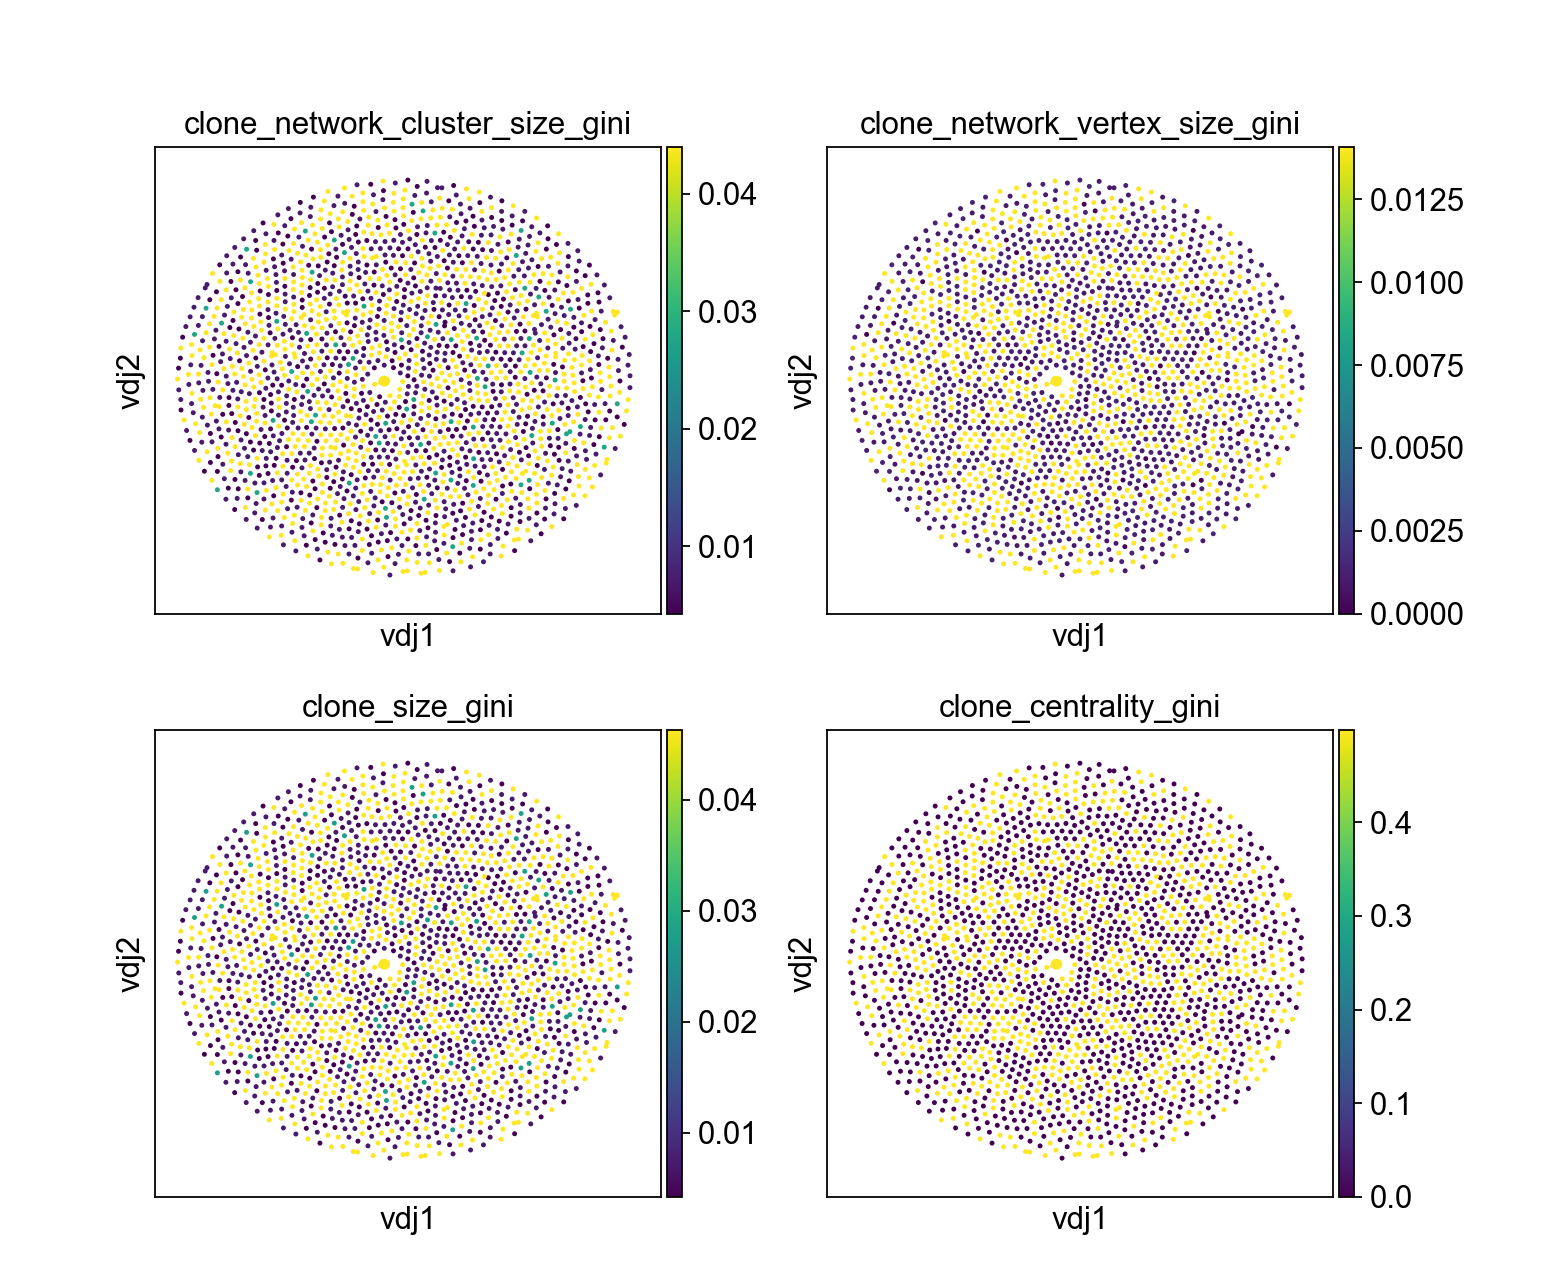

In [18]:
ddl.pl.clone_network(
    adata,
    color=[
        "clone_network_cluster_size_gini",
        "clone_network_vertex_size_gini",
        "clone_size_gini",
        "clone_centrality_gini",
    ],
    ncols=2,
    size=20,
)

With these particular samples, because there is not many expanded clones in general, the gini indices are quite low when calculated within each sample. We can re-run it by specifying `expanded_only = True` to only factor in expanded clones. We also specify the `key_added` option to create a new column instead of writing over the original columns.

In [19]:
ddl.tl.clone_diversity(
    vdj,
    groupby="sample_id",
    method="gini",
    metric="clone_network",
    expanded_only=True,
    key_added=[
        "clone_network_cluster_size_gini_expanded",
        "clone_network_vertex_size_gini_expanded",
    ],
)
ddl.tl.transfer(adata, vdj)

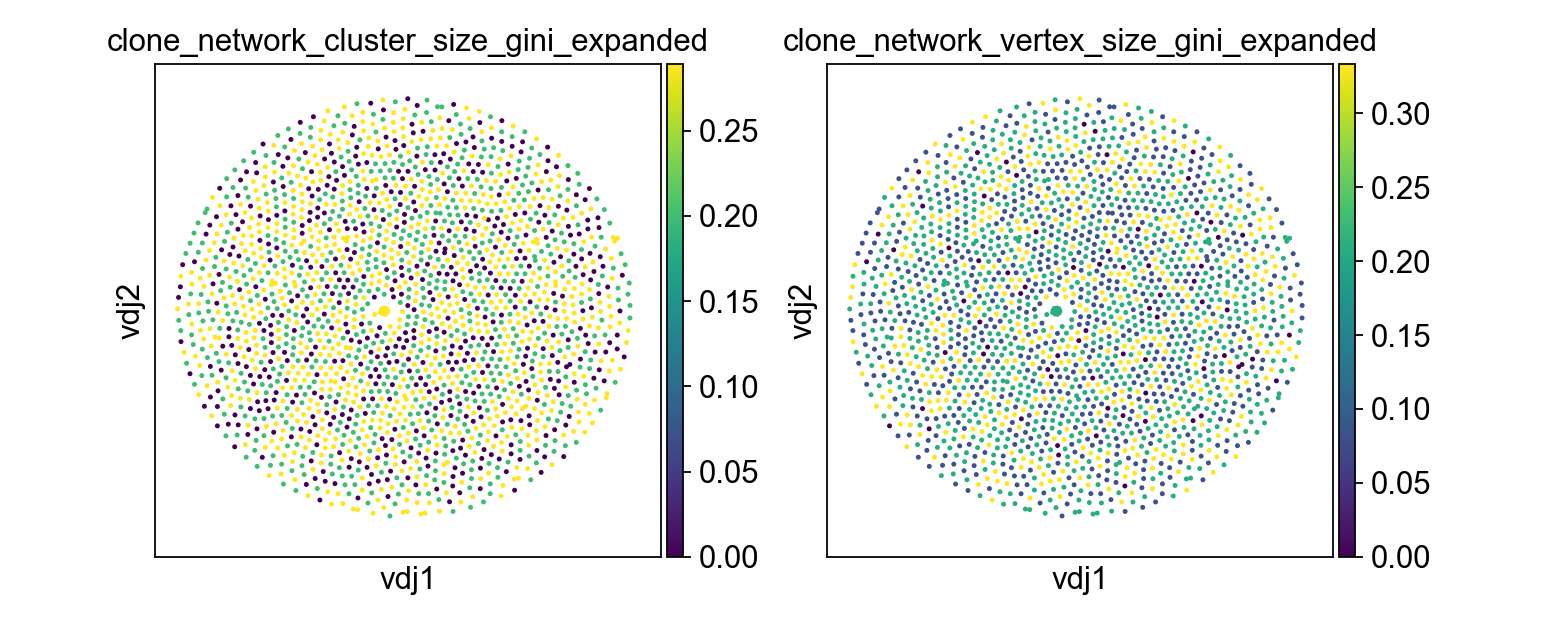

In [20]:
ddl.pl.clone_network(
    adata,
    color=[
        "clone_network_cluster_size_gini_expanded",
        "clone_network_vertex_size_gini_expanded",
    ],
    ncols=2,
    size=20,
)

We can also choose not to update the metadata to return a pandas dataframe.

In [21]:
gini = ddl.tl.clone_diversity(
    vdj, groupby="sample_id", method="gini", update_obs_meta=False
)
gini

,clone_network_cluster_size_gini,clone_network_vertex_size_gini
vdj_v1_hs_pbmc3,0.004237,0.001415
sc5p_v2_hs_PBMC_10k,0.007108,0.000952
vdj_nextgem_hs_pbmc3,0.043968,0.014073
sc5p_v2_hs_PBMC_1k,0.027772,0.000000


In [22]:
gini2 = ddl.tl.clone_diversity(
    vdj,
    groupby="sample_id",
    method="gini",
    update_obs_meta=False,
    expanded_only=True,
    key_added=[
        "clone_network_cluster_size_gini_expanded",
        "clone_network_vertex_size_gini_expanded",
    ],
)
gini2

,clone_network_cluster_size_gini_expanded,clone_network_vertex_size_gini_expanded
vdj_v1_hs_pbmc3,0.000000,0.333333
sc5p_v2_hs_PBMC_10k,0.200000,0.083333
vdj_nextgem_hs_pbmc3,0.289116,0.208333
sc5p_v2_hs_PBMC_1k,0.000000,0.000000


<Axes: xlabel='clone_network_cluster_size_gini', ylabel='clone_network_vertex_size_gini'>

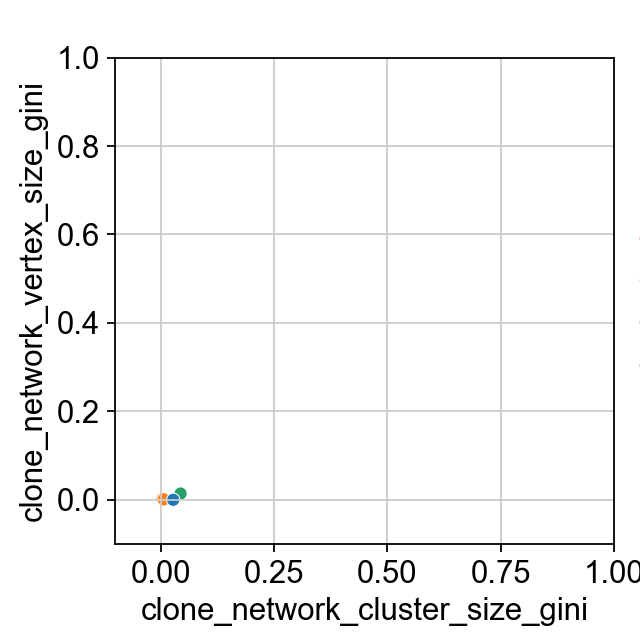

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

p = sns.scatterplot(
    x="clone_network_cluster_size_gini",
    y="clone_network_vertex_size_gini",
    data=gini,
    hue=gini.index,
    palette=dict(
        zip(adata.obs["sampleid"].cat.categories, adata.uns["sampleid_colors"])
    ),
)
p.set(ylim=(-0.1, 1), xlim=(-0.1, 1))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
p

<Axes: xlabel='clone_network_cluster_size_gini_expanded', ylabel='clone_network_vertex_size_gini_expanded'>

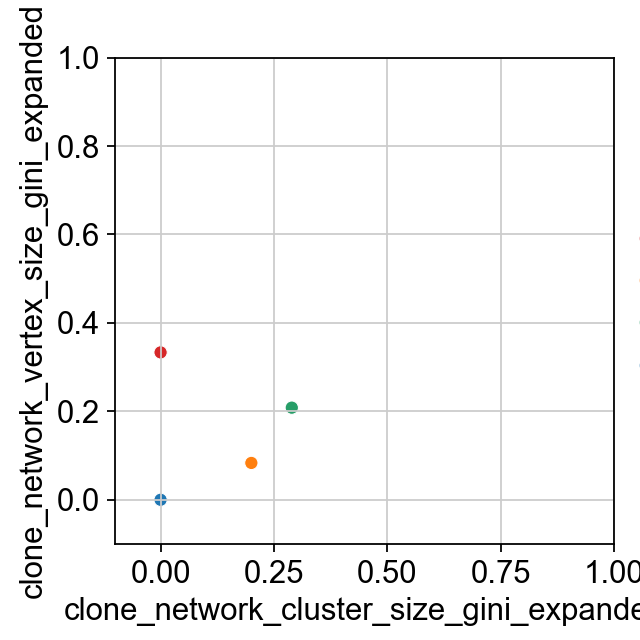

In [24]:
p2 = sns.scatterplot(
    x="clone_network_cluster_size_gini_expanded",
    y="clone_network_vertex_size_gini_expanded",
    data=gini2,
    hue=gini2.index,
    palette=dict(
        zip(adata.obs["sampleid"].cat.categories, adata.uns["sampleid_colors"])
    ),
)
p2.set(ylim=(-0.1, 1), xlim=(-0.1, 1))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
p2

We can also visualise what the results for the clone centrality gini indices.

In [25]:
gini = ddl.tl.clone_diversity(
    vdj,
    groupby="sample_id",
    method="gini",
    metric="clone_centrality",
    update_obs_meta=False,
)
gini

,clone_size_gini,clone_centrality_gini
vdj_v1_hs_pbmc3,0.004237,0.000000
sc5p_v2_hs_PBMC_10k,0.007108,0.000000
vdj_nextgem_hs_pbmc3,0.046251,0.498246
sc5p_v2_hs_PBMC_1k,0.027772,0.000000


<Axes: xlabel='clone_size_gini', ylabel='clone_centrality_gini'>

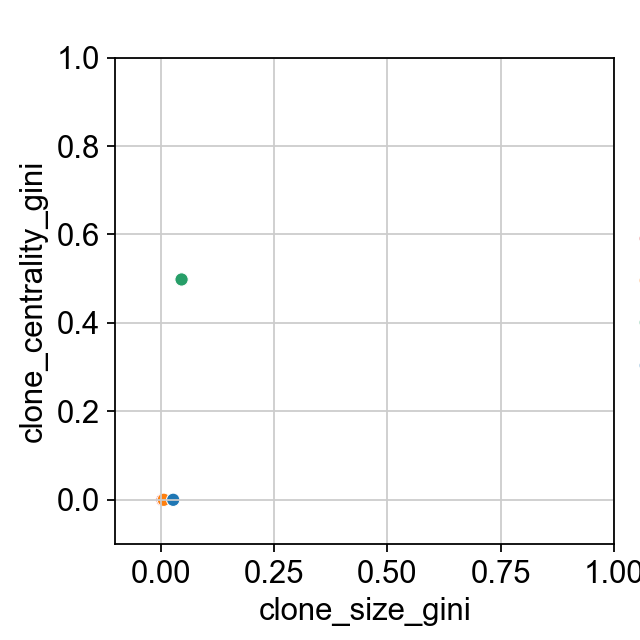

In [26]:
# not a great example because there's only 1 big clone in 1 sample.
p = sns.scatterplot(
    x="clone_size_gini",
    y="clone_centrality_gini",
    data=gini,
    hue=gini.index,
    palette=dict(
        zip(adata.obs["sampleid"].cat.categories, adata.uns["sampleid_colors"])
    ),
)
p.set(ylim=(-0.1, 1), xlim=(-0.1, 1))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
p

Chao1 is an estimator based on abundance

In [27]:
ddl.tl.clone_diversity(
    vdj, groupby="sample_id", method="chao1", update_obs_meta=False
)

,clone_size_chao1
vdj_v1_hs_pbmc3,55343.000000
sc5p_v2_hs_PBMC_10k,48513.200000
vdj_nextgem_hs_pbmc3,17196.333333
sc5p_v2_hs_PBMC_1k,1243.000000


For Shannon Entropy, we can calculate a normalized (inspired by [scirpy's function](https://icbi-lab.github.io/scirpy/generated/scirpy.tl.alpha_diversity.html?highlight=diversity#scirpy.tl.alpha_diversity)) and non-normalized value.

In [28]:
ddl.tl.clone_diversity(
    vdj, groupby="sample_id", method="shannon", update_obs_meta=False
)

,clone_size_normalized_shannon
vdj_v1_hs_pbmc3,0.999867
sc5p_v2_hs_PBMC_10k,0.999665
vdj_nextgem_hs_pbmc3,0.993710
sc5p_v2_hs_PBMC_1k,0.998743


In [29]:
ddl.tl.clone_diversity(
    vdj,
    groupby="sample_id",
    method="shannon",
    update_obs_meta=False,
    normalize=False,
)

,clone_size_shannon
vdj_v1_hs_pbmc3,8.875337
sc5p_v2_hs_PBMC_10k,9.439783
vdj_nextgem_hs_pbmc3,9.566974
sc5p_v2_hs_PBMC_1k,6.121578


That sums it up for now! Let me know if you have any ideas at [z.tuong@uq.edu.au] and I can try and see if i can implement it or we can work something out to collaborate on!